In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math

data = pd.read_csv('data/listings.csv')

# data.columns

In [2]:
data

,id,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,...,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,Unnamed: 74
0,187870,https://www.airbnb.com/rooms/187870,20210716195504,2021-07-16,Luxury studio 'Spiegelhof' in the centre of Ghent,The top floor of our house in the center of Gh...,We live in a quiet and pleasant neighborhood w...,https://a0.muscache.com/pictures/26c46224-795c...,904277,https://www.airbnb.com/users/show/904277,...,4.58,4.85,NaN,t,1,0,1,0,3.61,NaN
1,203806,https://www.airbnb.com/rooms/203806,20210716195504,2021-07-16,Flat close to Sint-Pieters Station!,This well-located and comfortable one-bedroom ...,The house is located in a dead-end street - so...,https://a0.muscache.com/pictures/fe477b7f-93ac...,999847,https://www.airbnb.com/users/show/999847,...,4.49,4.54,NaN,f,2,2,0,0,2.84,NaN
2,204245,https://www.airbnb.com/rooms/204245,20210716195504,2021-07-16,Modern studio's in Ghent centre,<b>The space</b><br />We offer luxury studio's...,NaN,https://a0.muscache.com/pictures/1766072/02965...,1003009,https://www.airbnb.com/users/show/1003009,...,4.97,4.63,NaN,f,2,2,0,0,0.29,NaN
3,216715,https://www.airbnb.com/rooms/216715,20210716195504,2021-07-16,converted loft,Please read full desription for how to get the...,It's close to all that you will want or need v...,https://a0.muscache.com/pictures/1927009/20760...,911466,https://www.airbnb.com/users/show/911466,...,4.89,4.76,NaN,t,1,1,0,0,4.31,NaN
4,252269,https://www.airbnb.com/rooms/252269,20210716195504,2021-07-16,Large & bright town House - Center Ghent - max 8p,"bright, spacious, authentic & beautifully rest...","our neighbourhood is quiet, but nicely vibrati...",https://a0.muscache.com/pictures/69675b54-3e78...,1195314,https://www.airbnb.com/users/show/1195314,...,4.98,4.72,NaN,f,1,1,0,0,2.23,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
918,51022259,https://www.airbnb.com/rooms/51022259,20210716195504,2021-07-16,Full apartment near Sint Pieters Station,This is a 2 bedroom apartment. Guests will en...,Apartment is located in neighborhood of Sint P...,the main station in Ghent. The street is very...,https://a0.muscache.com/pictures/47c0402d-8d28...,97573561,...,NaN,NaN,NaN,NaN,f,2,1,1,0.00,NaN
919,51036302,https://www.airbnb.com/rooms/51036302,20210716195504,2021-07-16,Guesthouse Flora,Geniet van de moderne en ouderwetse charme van...,De Flora is het meest noordelijke gedeelte van...,https://a0.muscache.com/pictures/186f59af-f089...,171955140,https://www.airbnb.com/users/show/171955140,...,NaN,NaN,NaN,f,1,1,0,0,NaN,NaN
920,51053223,https://www.airbnb.com/rooms/51053223,20210716195504,2021-07-16,Large modern house 10min from downtown Ghent/Gent,Just 10 minutes from historic downtown Ghent. ...,NaN,https://a0.muscache.com/pictures/7de8d4c4-0155...,2650664,https://www.airbnb.com/users/show/2650664,...,NaN,NaN,NaN,t,1,1,0,0,NaN,NaN
921,51056846,https://www.airbnb.com/rooms/51056846,20210716195504,2021-07-16,"Comfort, quiet en green in ancient part of center",NaN,NaN,https://a0.muscache.com/pictures/a7faff71-0c08...,45920980,https://www.airbnb.com/users/show/45920980,...,NaN,NaN,NaN,t,2,0,2,0,NaN,NaN


In [3]:
data_cleaned = data
# Some columns are shifted by an excessive comma. We shifted these columns by looking for errors in 'host_since'.
shifted = data_cleaned[data_cleaned'host_since'.str.match("20[0-2][0-9]-[0-1][0-9]-[0-3][0-9]")==False]
data_cleaned = data_cleaned[data_cleaned'host_since'.str.match("20[0-2][0-9]-[0-1][0-9]-[0-3][0-9]")==True]
shifted = shifted.shift(periods=-1, axis=1)
shifted'host_since'
# data_cleaned.append(shifted)

# For now we don't use this shifted data because we lose important data. We just drop the wrong records.
# We drop the last column as it's a useless column created by the excessive comma.
data_cleaned = data_cleaned.drop(columns='Unnamed: 74')


In [4]:
# Change t (true) and f (false) to 1 and 0
data_cleaned'host_is_superhost' = data_cleaned'host_is_superhost'.replace('t', 1).replace('f', 0)
data_cleaned'host_has_profile_pic' = data_cleaned'host_has_profile_pic'.replace('t', 1).replace('f', 0)
data_cleaned'host_identity_verified' = data_cleaned'host_identity_verified'.replace('t', 1).replace('f', 0)
data_cleaned'instant_bookable' = data_cleaned'instant_bookable'.replace('t', 1).replace('f', 0)


In [5]:
# The center of Ghent lies at 51.0544707, 3.7236719 (https://www.coordinatenbepalen.nl/coordinates/107915-gent-centrum)
# We calculate de distance of each listing to the center
ghent_lat = 51.0544707
ghent_long = 3.7236719

latitude = data_cleaned'latitude'.to_numpy()
longitude = data_cleaned'longitude'.to_numpy()
# data_cleaned'distance_to_center' = math.sqrt((data_cleaned'latitude' - ghent_lat)**2 + (data_cleaned'longitude' - ghent_lat)**2)
distance = np.sqrt((latitude - ghent_lat)**2 + (longitude - ghent_long)**2)
distance = pd.DataFrame(distance)

# distance = distance.rename(columns={'0': 'distance_to_center'})j
data_cleaned'distance_to_center' = distance


In [6]:
# NaN is set to 0 because there is no separate place to sleep, but we assume there is at least one place to sleep. 
# We investigated the data (see below) and discovered it's always a studio, lounge or a condo but you have to sleep in a general space.
# data_cleaned[data_cleaned'bedrooms'.isna()]
# data_cleaned'bedrooms' = data_cleaned'bedrooms'.fillna(0)


data_cleaned'bedrooms' = data_cleaned'bedrooms'.replace(np.NAN, 0).astype(int)
data_cleaned'beds' = data_cleaned'beds'.replace(np.NAN, 0).astype(int)

# data_cleaned'bedrooms'.sort_values().to_numpy()    


In [7]:
# accomodates in orde
data_cleaned'accommodates' = data_cleaned'accommodates'.astype(int)
# data_cleaned'accommodates'.sort_values().to_numpy()

In [8]:
# The data in 'room_type' is one of four possibilities: Entire home/apt, Private room, Shared room or Hotel. 
# This data isn't easy to work with so what we could do is replace them with a number between 0 and 3.
# The problem with this is that the model might assume some kind of order or hierarchy. 
# One-hot encoding is a better solution to this problem.

a = pd.get_dummies(data_cleaned'room_type', prefix="room_type")

frames = [data_cleaned, a]
data_cleaned = pd.concat(frames, axis=1)


data_cleaned.drop('room_type', inplace=True, axis=1)

data_cleaned.rename(
    columns={
        "room_type_Private room": "room_type_private", 
        "room_type_Entire home/apt": "room_type_entire", 
        "room_type_Hotel room": "room_type_hotel", 
        "room_type_Shared room": "room_type_shared"}, 
        inplace=True
    )

data_cleaned


,id,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,...,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,distance_to_center,room_type_entire,room_type_hotel,room_type_private,room_type_shared
0,187870,https://www.airbnb.com/rooms/187870,20210716195504,2021-07-16,Luxury studio 'Spiegelhof' in the centre of Ghent,The top floor of our house in the center of Gh...,We live in a quiet and pleasant neighborhood w...,https://a0.muscache.com/pictures/26c46224-795c...,904277,https://www.airbnb.com/users/show/904277,...,1,0,1,0,3.61,0.021028,0,0,1,0
1,203806,https://www.airbnb.com/rooms/203806,20210716195504,2021-07-16,Flat close to Sint-Pieters Station!,This well-located and comfortable one-bedroom ...,The house is located in a dead-end street - so...,https://a0.muscache.com/pictures/fe477b7f-93ac...,999847,https://www.airbnb.com/users/show/999847,...,2,2,0,0,2.84,0.014084,1,0,0,0
2,204245,https://www.airbnb.com/rooms/204245,20210716195504,2021-07-16,Modern studio's in Ghent centre,<b>The space</b><br />We offer luxury studio's...,NaN,https://a0.muscache.com/pictures/1766072/02965...,1003009,https://www.airbnb.com/users/show/1003009,...,2,2,0,0,0.29,0.005302,1,0,0,0
3,216715,https://www.airbnb.com/rooms/216715,20210716195504,2021-07-16,converted loft,Please read full desription for how to get the...,It's close to all that you will want or need v...,https://a0.muscache.com/pictures/1927009/20760...,911466,https://www.airbnb.com/users/show/911466,...,1,1,0,0,4.31,0.008695,1,0,0,0
4,252269,https://www.airbnb.com/rooms/252269,20210716195504,2021-07-16,Large & bright town House - Center Ghent - max 8p,"bright, spacious, authentic & beautifully rest...","our neighbourhood is quiet, but nicely vibrati...",https://a0.muscache.com/pictures/69675b54-3e78...,1195314,https://www.airbnb.com/users/show/1195314,...,1,1,0,0,2.23,0.004398,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
917,51007977,https://www.airbnb.com/rooms/51007977,20210716195504,2021-07-16,Lovely bright room with double bed near centre,You will enjoy easy access to everything in Ge...,NaN,https://a0.muscache.com/pictures/5e4d2c67-c0b1...,412643939,https://www.airbnb.com/users/show/412643939,...,2,0,2,0,NaN,NaN,0,0,1,0
919,51036302,https://www.airbnb.com/rooms/51036302,20210716195504,2021-07-16,Guesthouse Flora,Geniet van de moderne en ouderwetse charme van...,De Flora is het meest noordelijke gedeelte van...,https://a0.muscache.com/pictures/186f59af-f089...,171955140,https://www.airbnb.com/users/show/171955140,...,1,1,0,0,NaN,NaN,1,0,0,0
920,51053223,https://www.airbnb.com/rooms/51053223,20210716195504,2021-07-16,Large modern house 10min from downtown Ghent/Gent,Just 10 minutes from historic downtown Ghent. ...,NaN,https://a0.muscache.com/pictures/7de8d4c4-0155...,2650664,https://www.airbnb.com/users/show/2650664,...,1,1,0,0,NaN,NaN,1,0,0,0
921,51056846,https://www.airbnb.com/rooms/51056846,20210716195504,2021-07-16,"Comfort, quiet en green in ancient part of center",NaN,NaN,https://a0.muscache.com/pictures/a7faff71-0c08...,45920980,https://www.airbnb.com/users/show/45920980,...,2,0,2,0,NaN,NaN,0,0,1,0


In [9]:
data_cleaned'price'=data_cleaned'price'.str.replace(',','')
data_cleaned'price'=data_cleaned'price'.str.replace('$','')
data_cleaned["price"] = pd.to_numeric(data_cleaned["price"])

C:\Users\bavop\AppData\Local\Temp/ipykernel_15276/2195279143.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  data_cleaned['price']=data_cleaned['price'].str.replace('$','')


In [10]:
#availability -> volledig correct
data_cleaned'availability_365'.to_numpy()

array([326, 276, 124, 358, 326, 201, 365,  77, 166, 176, 212, 346, 337,
       152,  98, 181, 275, 179, 240, 331, 311, 321,   0, 170, 275, 150,
        70,  45, 339,  13, 363, 288, 263, 256,  48, 288, 131,   4, 328,
       138, 342,   0, 347, 142, 140, 156, 129, 114,  22,  31, 166, 159,
       234, 321, 364, 121, 129, 177, 263, 252, 159, 196, 364,   0,   9,
         0, 180, 307,   0, 331,  87, 122,   0, 321,  89, 179, 165, 284,
       335,   0, 222, 349, 140, 350, 110, 353, 170, 343, 352, 308, 340,
        34, 353, 256, 287, 193,  93, 165, 214, 167, 330,  25, 327, 107,
        26, 186, 329, 169, 179, 179, 225, 349,  49, 346, 324, 342,  75,
       329, 329, 133, 325, 320, 318, 257,  27, 299,   6, 196, 340,  70,
       194, 335,  90, 336,  90, 362,  73,  49, 228,  10,  99, 142,   0,
       162, 196, 358, 179, 196, 359, 364, 309,  61, 346, 284, 140,  58,
        75, 107, 303, 181, 338, 339,  76,  13,  27, 187,  18,  88, 318,
       164, 319, 293, 326, 363, 335, 286, 352,  92, 179, 318,  1

In [11]:
#number_of_reviews is oké
#number_of_reviews_ltm oké
#number_of_reviews_l30d oké
#review_scores zien er oké uit


#deze heeft NAN's -> maar sommige 
#data_cleaned.loc[data_cleaned'bathrooms_text'=='0 shared baths''description'

#data_cleaned'bathrooms_text'.unique()

test=[]

for x in data_cleaned'bathrooms_text'.str.findall('\d[\.]*[\d]*'):
  if len(x)!=0:
    test.append(float(x[0]))
  else:
    test.append(float(0))

data_cleaned'bathrooms' = test

data_cleaned.loc[:,'bathrooms','bathrooms_text']

# data_cleaned'bathrooms'.sort_values()

,bathrooms,bathrooms_text
0,1.5,1.5 baths
1,1.0,1 bath
2,1.0,1 bath
3,1.5,1.5 baths
4,2.5,2.5 baths
...,...,...
917,1.0,1 shared bath
919,2.0,2 baths
920,1.0,1 bath
921,1.0,1 bath


In [12]:
# set columns to correct type

data_cleaned'host_since' = pd.to_datetime(data_cleaned'host_since')
data_cleaned'host_listings_count' = data_cleaned'host_listings_count'.astype(int)

data_cleaned'availability_30' = data_cleaned'availability_30'.astype(int)
data_cleaned'availability_60' = data_cleaned'availability_60'.astype(int)
data_cleaned'availability_90' = data_cleaned'availability_90'.astype(int)
data_cleaned'availability_365' = data_cleaned'availability_365'.astype(int)

data_cleaned'review_scores_rating' = data_cleaned'review_scores_rating'.astype(float)
data_cleaned'number_of_reviews' = data_cleaned'number_of_reviews'.astype(float)

data_cleaned'host_is_superhost' = data_cleaned'host_is_superhost'.astype(int)
data_cleaned'host_has_profile_pic' = data_cleaned'host_has_profile_pic'.astype(int)
data_cleaned'host_identity_verified' = data_cleaned'host_identity_verified'.astype(int)
data_cleaned'number_of_reviews_ltm' = data_cleaned'number_of_reviews_ltm'.astype(int)
data_cleaned'number_of_reviews_l30d' = data_cleaned'number_of_reviews_l30d'.astype(int)
data_cleaned'instant_bookable' = data_cleaned'instant_bookable'.astype(int)


In [13]:
# data_cleaned.columns.sort_values()

In [24]:
features = [
    'host_since', 
    'host_location',
    'host_is_superhost',
    'host_listings_count',
    'host_has_profile_pic',
    'host_identity_verified',
    'latitude',
    'longitude',
    'accommodates',
    'bathrooms',
    'bedrooms',
    'beds',
    'availability_30',
    'availability_60',
    'availability_90',
    'availability_365',
    'number_of_reviews',
    'number_of_reviews_ltm',
    'number_of_reviews_l30d',
    'review_scores_rating',
    'review_scores_accuracy',
    'review_scores_cleanliness',
    'review_scores_checkin',
    'review_scores_communication',
    'review_scores_location',
    'review_scores_value',
    'room_type_entire',
    'room_type_hotel',
    'room_type_private',
    'room_type_shared',
    'instant_bookable'
]


# for col in features:
#     print(col, " ", data_cleaned[col].dtypes, "\n")


In [55]:
features = [
    'host_since', 
    # 'host_location',
    'host_is_superhost',
    'host_listings_count',
    'host_has_profile_pic',
    'host_identity_verified',
    'latitude',
    'longitude',
    'accommodates',
    'bathrooms',
    'bedrooms',
    'beds',
    'availability_30',
    'availability_60',
    'availability_90',
    'availability_365',
    'number_of_reviews',
    'number_of_reviews_ltm',
    'number_of_reviews_l30d',
    'review_scores_rating',
    'review_scores_accuracy',
    'review_scores_cleanliness',
    'review_scores_checkin',
    'review_scores_communication',
    'review_scores_location',
    'review_scores_value',
    'room_type_entire',
    'room_type_hotel',
    'room_type_private',
    'room_type_shared',
    'instant_bookable'
]

In [56]:
# We drop all the columns that we won't use
for col in data_cleaned.columns:
    if col not in features and col != 'price':
        data_cleaned = data_cleaned.drop([col], axis=1)

data_cleaned.columns

Index(['host_since', 'host_is_superhost', 'host_listings_count',
       'host_has_profile_pic', 'host_identity_verified', 'latitude',
       'longitude', 'accommodates', 'bathrooms', 'bedrooms', 'beds', 'price',
       'availability_30', 'availability_60', 'availability_90',
       'availability_365', 'number_of_reviews', 'number_of_reviews_ltm',
       'number_of_reviews_l30d', 'review_scores_rating',
       'review_scores_accuracy', 'review_scores_cleanliness',
       'review_scores_checkin', 'review_scores_communication',
       'review_scores_location', 'review_scores_value', 'instant_bookable',
       'room_type_entire', 'room_type_hotel', 'room_type_private',
       'room_type_shared'],
      dtype='object')

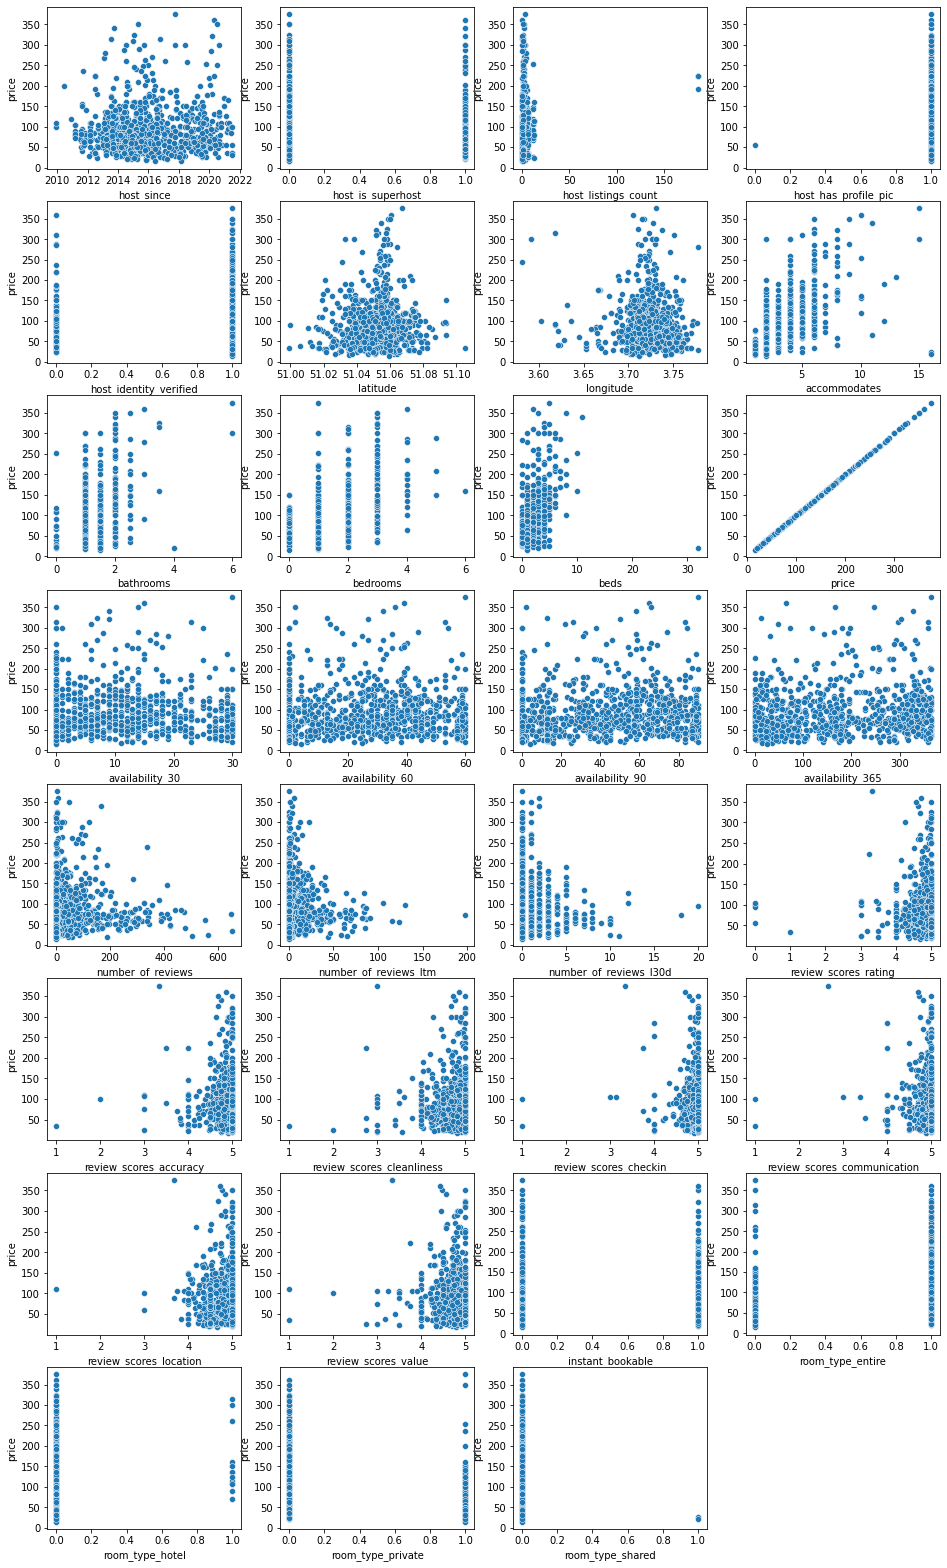

In [57]:
plt.figure(figsize=(16,28))
for i, k in enumerate(data_cleaned.keys()):
    plt.subplot(8, 4, 1+i)
    sns.scatterplot(x=data_cleaned[k], y=data_cleaned["price"])